# 📊 Fase 3: Análisis de Productos y Ventas (EDA Estratégico)
---
**Proyecto:** Olist E-commerce (Brasil)  
**Objetivo:** Identificar las categorías líderes y analizar el comportamiento de ventas para optimizar el catálogo, utilizando un enfoque híbrido de Python y SQL.

## 1. Importación y Carga de Datos Procesados
* Carga de datasets desde la capa `processed`.
* Configuración de visualización profesional.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configuración
sns.set_theme(style="whitegrid")

# Carga optimizada: le decimos a pandas qué columnas son fechas desde el inicio
orders = pd.read_csv('../data/processed/orders_cleaned.csv',
                    parse_dates=['order_purchase_timestamp', 
                                  'order_approved_at', 
                                  'order_delivered_carrier_date', 
                                  'order_delivered_customer_date', 
                                  'order_estimated_delivery_date'])
items = pd.read_csv('../data/processed/items_cleaned.csv')
products = pd.read_csv('../data/processed/products_cleaned.csv')
order_items_totals = pd.read_csv('../data/processed/order_items_totals.csv')

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time_days             96476 non-null  float64       
 9   delta_estimated_days           96476 non-null  float64       
dtypes: datetime64[ns](5), float64(2), object(3)
memory usage: 7.6+ MB


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## 2. Vista General de Ventas (EDA dirigido)
* Análisis de tendencias temporales (Ventas por mes).
* Estadísticos descriptivos de precios y fletes.

In [9]:
# Analizando la evolución mensual
orders['month_year'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders.groupby('month_year').size()
monthly_sales_df = pd.DataFrame({
    'month_year':monthly_sales.index,
    'total_orders':monthly_sales.values
})

In [10]:
print(type(monthly_sales))

<class 'pandas.core.series.Series'>


In [11]:
monthly_sales_df.head()

,month_year,total_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


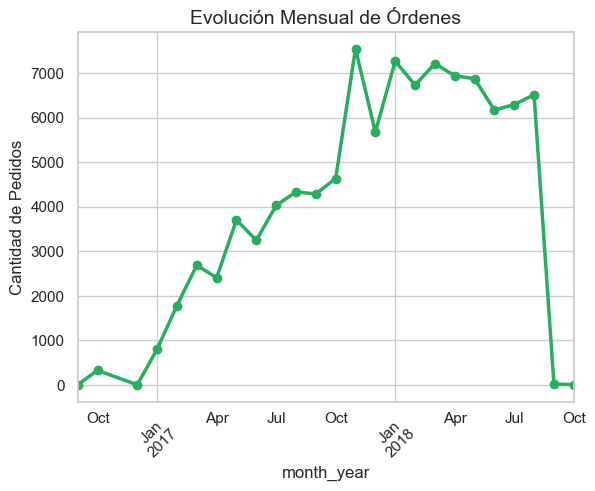

In [12]:
# Gráfico de tendencia
monthly_sales.plot(kind='line',marker='o', color='#27ae60', linewidth=2.5)
plt.title('Evolución Mensual de Órdenes', fontsize=14)
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.show()

## 3. Construcción del Dataset Analítico
* **Enfoque Relacional:** Realizo un `INNER JOIN` entre la tabla de transacciones (`items`) y el catálogo de productos (`products`) utilizando el `product_id` como llave primaria/foránea.
* **Objetivo:** Enriquecer los datos de ventas con los nombres de categorías para permitir la agregación a nivel de negocio.

In [14]:
df_items_productos = pd.merge(items, products, on='product_id', how='inner')

In [15]:
df_items_productos.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


## 4. Resolución de la Pregunta de Negocio (Pandas)
* **Lógica de Agregación:** Se agrupan los datos por categoría de producto, calculando el volumen de ventas total (Revenue), la frecuencia de pedidos (Count) y el valor promedio por transacción (Ticket Promedio).
* **Criterio de Éxito:** Identificación de las categorías "Tier 1" que sostienen el ingreso bruto del marketplace.

In [17]:
# Calculamos las ventas totales por categoría, I
category_sales = df_items_productos.groupby('product_category_name')['price'].agg(['count','sum','mean'])

In [18]:
category_sales.head()

,count,sum,mean
product_category_name,,,
agro_industria_e_comercio,212,72530.47,342.124858
alimentos,510,29393.41,57.634137
alimentos_bebidas,278,15179.48,54.602446
artes,209,24202.64,115.802105
artes_e_artesanato,24,1814.01,75.583750


In [19]:
# Calculamos las ventas totales por categoría, II
category_sales = df_items_productos.groupby('product_category_name')['price'].agg(['count','sum','mean']).reset_index()

In [20]:
category_sales.head()

,product_category_name,count,sum,mean
0,agro_industria_e_comercio,212,72530.47,342.124858
1,alimentos,510,29393.41,57.634137
2,alimentos_bebidas,278,15179.48,54.602446
3,artes,209,24202.64,115.802105
4,artes_e_artesanato,24,1814.01,75.583750


In [21]:
# Renombro las columnas para que sea claro
category_sales.columns = ['category', 'total_orders', 'total_revenue', 'avg_ticket']

In [22]:
category_sales.head()

,category,total_orders,total_revenue,avg_ticket
0,agro_industria_e_comercio,212,72530.47,342.124858
1,alimentos,510,29393.41,57.634137
2,alimentos_bebidas,278,15179.48,54.602446
3,artes,209,24202.64,115.802105
4,artes_e_artesanato,24,1814.01,75.583750


In [23]:
# Busco las 10 mejores categorias en venta
category_sales.sort_values(by='total_revenue', ascending=False).head(10)

,category,total_orders,total_revenue,avg_ticket
11,beleza_saude,9670,1258681.34,130.163531
66,relogios_presentes,5991,1205005.68,201.135984
13,cama_mesa_banho,11115,1036988.68,93.296327
32,esporte_lazer,8641,988048.97,114.344285
44,informatica_acessorios,7827,911954.32,116.513903
54,moveis_decoracao,8334,729762.49,87.564494
26,cool_stuff,3796,635290.85,167.357969
73,utilidades_domesticas,6964,632248.66,90.788148
8,automotivo,4235,592720.11,139.957523
40,ferramentas_jardim,4347,485256.46,111.630196


## 5. (Sección Especial) Validación con SQL Avanzado
* **Objetivo:** Replicar el análisis de categorías utilizando SQL para validar la consistencia de los datos.
* **Técnicas utilizadas:** * **CTE (Common Table Expressions):** Para una estructura de consulta modular y legible.
    * **Window Functions (`RANK`):** Para jerarquizar las categorías por volumen de ventas.
    * **Operaciones Aritméticas:** Cálculo del Ticket Promedio directamente en la consulta.

In [25]:
import duckdb

In [26]:
query = """
        WITH CategoryStats AS (
            SELECT product_category_name AS category,
                SUM(price) AS total_revenue,
                COUNT(order_id) AS total_orders
            FROM df_items_productos
            GROUP BY category
        )
        SELECT category,
               total_orders,
               total_revenue,
               (total_revenue/total_orders) AS avg_ticket,
               RANK() OVER(
               ORDER BY total_revenue DESC
               ) AS sales_rank
        FROM CategoryStats
        LIMIT 10
        """

In [27]:
sql_top_10 = duckdb.query(query).df()

In [28]:
print("🎯 Resultado validado con SQL:")
display(sql_top_10)

🎯 Resultado validado con SQL:


,category,total_orders,total_revenue,avg_ticket,sales_rank
0,beleza_saude,9670,1258681.34,130.163531,1
1,relogios_presentes,5991,1205005.68,201.135984,2
2,cama_mesa_banho,11115,1036988.68,93.296327,3
3,esporte_lazer,8641,988048.97,114.344285,4
4,informatica_acessorios,7827,911954.32,116.513903,5
5,moveis_decoracao,8334,729762.49,87.564494,6
6,cool_stuff,3796,635290.85,167.357969,7
7,utilidades_domesticas,6964,632248.66,90.788148,8
8,automotivo,4235,592720.11,139.957523,9
9,ferramentas_jardim,4347,485256.46,111.630196,10


## 6. Visualización Estratégica
* **Objetivo:** Comparar visualmente el Revenue vs. el Ticket Promedio para identificar categorías de alto valor.

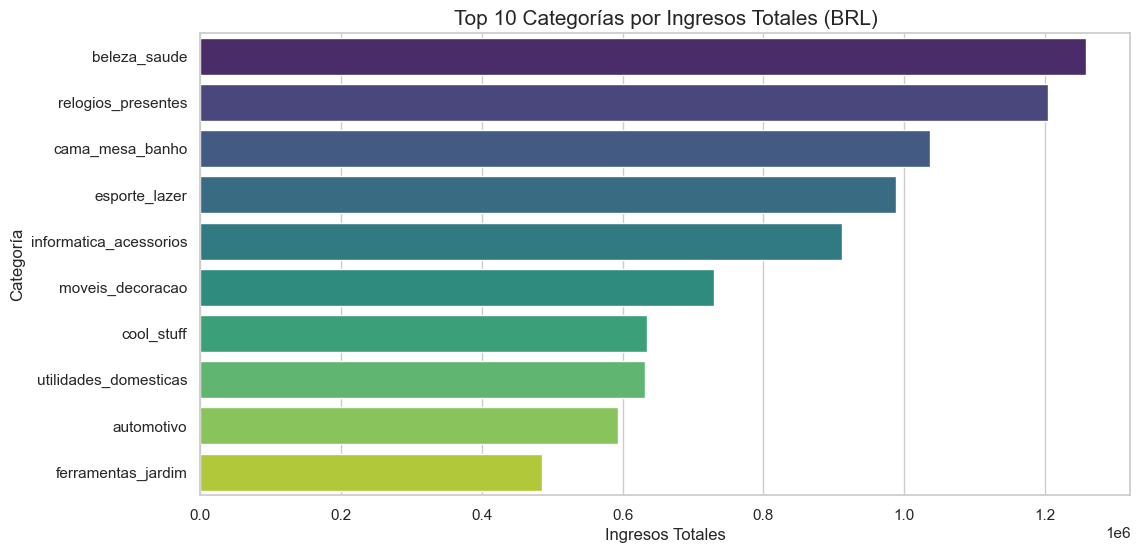

In [62]:
# Creo un gráfico de barras para el top 10
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=sql_top_10, 
    x='total_revenue',
    y='category', 
    hue='category',
    palette='viridis',
    legend=False,
    errorbar=None
)
plt.title('Top 10 Categorías por Ingresos Totales (BRL)', fontsize=15)
plt.xlabel('Ingresos Totales')
plt.ylabel('Categoría')
plt.show()

## 7. Conclusiones de Negocio

* **Dominio de Salud y Belleza (`beleza_saude`):**
Esta categoría lidera en ingresos totales, lo que sugiere una alta demanda sostenida y una base de clientes recurrente. Es probable que esté asociada a productos de consumo frecuente (cuidado personal, higiene, bienestar), lo que la convierte en un pilar clave para la estabilidad del revenue y una buena candidata para programas de fidelización.

* **Artículos de Lujo y Regalos (`relogios_presentes`):**
Aunque presenta un menor volumen de pedidos, esta categoría destaca por tener el **Ticket promedio más alto del Top 10 ($201.13)**, posicionándose como la categoría más "premium". Esto indica compras menos frecuentes pero de mayor valor, ideal para estrategias enfocadas en fechas especiales, campañas estacionales y énfasis en experiencia de usuario y branding.

* **Oportunidad en Hogar (`cama_mesa_banho`):**
Esta categoría muestra el mayor volumen de pedidos (`count`), pero con un ticket promedio relativamente bajo. Esto sugiere una base amplia de clientes que realizan compras frecuentes de bajo valor unitario.
Aquí existe una clara oportunidad de aplicar estrategias de *cross‑selling*, es decir, ofrecer productos complementarios (por ejemplo, sábanas con toallas o accesorios de baño) para aumentar el valor promedio por pedido sin depender de adquirir nuevos clientes.

En conjunto, el análisis revela categorías consolidadas que sostienen el ingreso, categorías premium que maximizan el ticket promedio y categorías de alto volumen donde optimizar estrategias comerciales puede generar un impacto significativo en el revenue total.